In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b7/f8/32d6b5aa4c4bc045fa2c4c58f88c325facc54721956c6313f0afea8ea853/pandas-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/72/b2/02770e60c4e2f7e158d923ab0dea4e9f146a2dbf267fec6d8dc61d475689/numpy-1.25.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/502.3 kB ? eta -:--:--
     -- ------------------------------------- 30.7/502.3 kB ? eta -:--:--
     -------- ----------------------------- 112.6/502.3 kB 1.7 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     ------------------------ ------------- 327.7/502.3 kB 1.2 MB/s eta 0:00:01
     ------------------------ ----

In [3]:
"""
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

options = Options()
driver = webdriver.Chrome("C:\Program Files\chromedriver_linux64")
download_url = 'https://www.boatrace.jp/owpc/pc/extra/data/download.html'
driver.get(download_url)
time.sleep(7)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
datas = soup.find('ul', attrs={'class':'data_list h-mt15'})
datas_url = datas.find_all('a')
for data_url in datas_url:
    home_url = 'https://www.boatrace.jp'
    data_url = home_url + data_url.get('href')
    driver.get(data_url)
    time.sleep(5)
driver.close()
"""

NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [7]:
"""
import time
from selenium import webdriver #Selenium Webdriverをインポートする
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Serviceオブジェクトを作成
service = Service(ChromeDriverManager().install())

# Serviceオブジェクトを使用してWebDriverを作成
options = Options()
driver = webdriver.Chrome(service=service, options=options)

hall_pref="大阪府"
hall_name="123N+松原"

hp_url=f"https://ana-slo.com/ホールデータ/{hall_pref}/"

time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド

search_box = driver.find_element_by_name("q") #DOM操作
 
search_box.send_keys('NakamuraBlog') #Google検索ボックス内に「NakamuraBlog」と入力
search_box.submit() #Google検索ボタンのクリック 
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
research_result = driver.find_element_by_partial_link_text("nkmrdai") #検索結果hrefタグ内に「nkmradai」があるリンクを探す
research_result.click() #クリックする。 #このタイミングでNakamuraBlogのトップページが開かれたらOK
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
driver.quit() #Chromeブラウザを閉じる
"""

Exception: No such driver version 115.0.5790.110 for win32

## アナスロデータ収集

In [64]:
import csv
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

shop_pref="兵庫県"
shop_name="タイヨー六甲道"
# スクレイピング対象のURL
url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
# ウェブページをダウンロード
response = requests.get(url)

# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')

time.sleep(3)

div_element = soup.find('div', class_="date-list-area")
a_elements = div_element.findAll("a")
days_list = []
for a_element in a_elements[0:91]:
    days_list.append(a_element.text)
print(days_list)

['2023/09/11(月)', '2023/09/10(日)', '2023/09/09(土)', '2023/09/08(金)', '2023/09/07(木)', '2023/09/06(水)', '2023/09/04(月)', '2023/09/03(日)', '2023/09/02(土)', '2023/09/01(金)', '2023/08/31(木)', '2023/08/30(水)', '2023/08/29(火)', '2023/08/28(月)', '2023/08/27(日)', '2023/08/26(土)', '2023/08/25(金)', '2023/08/24(木)', '2023/08/23(水)', '2023/08/22(火)', '2023/08/21(月)', '2023/08/20(日)', '2023/08/19(土)', '2023/08/18(金)', '2023/08/17(木)', '2023/08/16(水)', '2023/08/15(火)', '2023/08/14(月)', '2023/08/13(日)', '2023/08/12(土)', '2023/08/11(金)', '2023/08/10(木)', '2023/08/09(水)', '2023/08/07(月)', '2023/08/06(日)', '2023/08/05(土)', '2023/08/04(金)', '2023/08/03(木)', '2023/08/02(水)', '2023/08/01(火)', '2023/07/31(月)', '2023/07/30(日)', '2023/07/29(土)', '2023/07/28(金)', '2023/07/27(木)', '2023/07/26(水)', '2023/07/25(火)', '2023/07/24(月)', '2023/07/23(日)', '2023/07/22(土)', '2023/07/21(金)', '2023/07/20(木)', '2023/07/19(水)', '2023/07/18(火)', '2023/07/17(月)', '2023/07/16(日)', '2023/07/15(土)', '2023/07/14(金)', '2023/07/13(木

In [ ]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re

# チェリー狙いでのブドウ確率を計算
def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
        #ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num==1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num==2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num==3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num==4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)                                                                                                                          
    except:
        return 0
# 正規表現パターンを定義
pattern = r'\([^)]*\)'
shop_pref="兵庫県"
shop_name="タイヨー六甲道"
# 日付を取得するための対象URL
url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
# ウェブページをダウンロード
response = requests.get(url)

# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')
wait_time=random.uniform(3, 5)
time.sleep(wait_time)

div_element = soup.find('div', class_="date-list-area")
a_elements = div_element.findAll("a")
days_list = []
#ここで何日分集めるか指定
for a_element in a_elements[0:365]:
    days_list.append(a_element.text)
print(days_list)

# 入力形式を指定
input_format = "%Y/%m/%d"
# 出力形式を指定
output_format = "%Y-%m-%d"

column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数", "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
df = pd.DataFrame(columns=column_names)
for day_with_day_of_week in days_list:
    try:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)
    
        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)
    
        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')
    
        wait_time=random.uniform(3, 5)
        time.sleep(wait_time)
    
        #アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is None:
            happy_rows=[]
        else:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            im_rows = table.findAll("tr")
            #最後の要素を削除
            del im_rows[-1]
        #マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        if h4_element is None:
            my_rows=[]
        else:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            #最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]
    
        #ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        if h4_element is None:
            fanky_rows=[]
        else:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            #最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]
    
        #ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        if h4_element is None:
            happy_rows=[]
        else:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            #最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]
        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0]=="台番号":
                pass
            else:
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow
    
        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow
    
        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow
    except:
        pass
df.to_csv(f"{shop_name}.csv", index=False, encoding = "shift-jis")
print("終了")

['2023/09/12(火)', '2023/09/11(月)', '2023/09/10(日)', '2023/09/09(土)', '2023/09/08(金)', '2023/09/07(木)', '2023/09/06(水)', '2023/09/04(月)', '2023/09/03(日)', '2023/09/02(土)', '2023/09/01(金)', '2023/08/31(木)', '2023/08/30(水)', '2023/08/29(火)', '2023/08/28(月)', '2023/08/27(日)', '2023/08/26(土)', '2023/08/25(金)', '2023/08/24(木)', '2023/08/23(水)', '2023/08/22(火)', '2023/08/21(月)', '2023/08/20(日)', '2023/08/19(土)', '2023/08/18(金)', '2023/08/17(木)', '2023/08/16(水)', '2023/08/15(火)', '2023/08/14(月)', '2023/08/13(日)', '2023/08/12(土)', '2023/08/11(金)', '2023/08/10(木)', '2023/08/09(水)', '2023/08/07(月)', '2023/08/06(日)', '2023/08/05(土)', '2023/08/04(金)', '2023/08/03(木)', '2023/08/02(水)', '2023/08/01(火)', '2023/07/31(月)', '2023/07/30(日)', '2023/07/29(土)', '2023/07/28(金)', '2023/07/27(木)', '2023/07/26(水)', '2023/07/25(火)', '2023/07/24(月)', '2023/07/23(日)', '2023/07/22(土)', '2023/07/21(金)', '2023/07/20(木)', '2023/07/19(水)', '2023/07/18(火)', '2023/07/17(月)', '2023/07/16(日)', '2023/07/15(土)', '2023/07/14(金

## 特徴量作成、可視化

回転数不足 の割合 : 0.5549573344169036
設定1 の割合 : 0.23002167140728702
設定2 の割合 : 0.08539888934037654
設定3 の割合 : 0.04361370716510903
設定4 の割合 : 0.056548828389543546
設定5 の割合 : 0.02255180820804551
設定6 の割合 : 0.00690776107273466


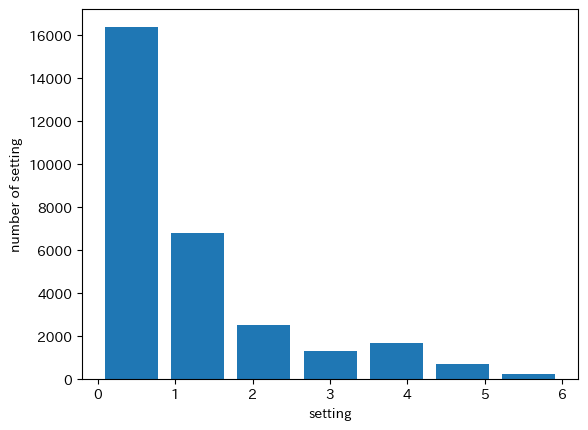

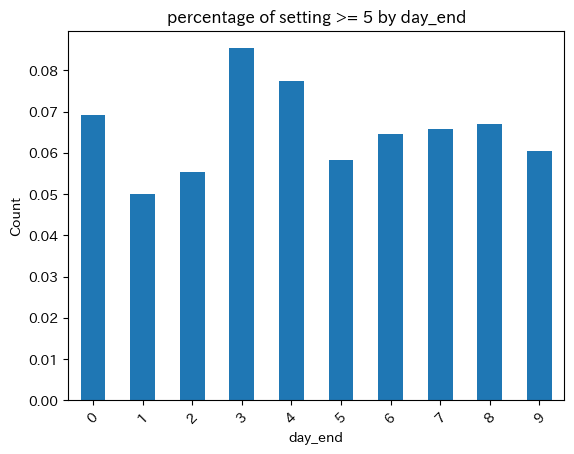

In [68]:

import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
pd.set_option('display.max_rows', 10000)
shop_name=shop_name="タイヨー六甲道"
main_data=pd.read_csv(f"{shop_name}.csv", encoding="shift-jis")

#分数を変換
main_data['合成確率'] = main_data['合成確率'] .str.replace('1/','')
main_data['合成確率']=main_data['合成確率'].astype('float64')
main_data['BB確率'] = main_data['BB確率'] .str.replace('1/','')
main_data['BB確率']=main_data['BB確率'].astype('float64')
main_data['RB確率'] = main_data['RB確率'] .str.replace('1/','')
main_data['RB確率']=main_data['RB確率'].astype('float64')

#一旦すべて設定１とする
main_data['setting'] = 1
#アイムジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 399.6) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 331.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 315.1) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP") & (main_data["ブドウ確率"]<5.90),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#マイジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 385.5) & (main_data['機種名']=="マイジャグラーV") & (main_data["ブドウ確率"]<=5.90),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 336.1) & (main_data['機種名']=="マイジャグラーV") & (main_data["ブドウ確率"]<=5.85),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 290.0) & (main_data['機種名']=="マイジャグラーV") & (main_data["ブドウ確率"]<=5.80),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 268.6) & (main_data['機種名']=="マイジャグラーV") & (main_data["ブドウ確率"]<=5.78),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 229.1) & (main_data['機種名']=="マイジャグラーV") & (main_data["ブドウ確率"]<=5.76),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#ファンキージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 407.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 366.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.88),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 322.8) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.83),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 299.3) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.76),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 262.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.67),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#ハッピージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.04),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.01),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=5.98),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=5.84),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=5.81),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う

#時刻データに変換
main_data['日付'] = pd.to_datetime(main_data['日付'])

#特徴量作成
main_data['year'] = main_data['日付'].dt.year #年度
main_data['month'] = main_data['日付'].dt.month #月
main_data['day'] = main_data['日付'].dt.day #日
main_data['weekday'] = main_data['日付'].dt.weekday #曜日
main_data['day_end'] = main_data['日付'].astype(str).str[-1].astype(int) #日付末尾
main_data['day_end_2'] = main_data['日付'].astype(str).str[-2].astype(int) #日付2桁目
main_data['day_zoro'] = 0
main_data.loc[main_data['day_end']==main_data['day_end_2'],'day_zoro'] = 1 #ゾロ目を１とする

main_data['machine_end'] = main_data['台番号'].astype(str).str[-1].astype(int) #台番号末尾
main_data['machine_end_2'] = main_data['台番号'].astype(str).str[-2].astype(int) #台番号2桁目
main_data['machine_zoro'] = 0
main_data.loc[main_data['machine_end']==main_data['machine_end_2'],'machine_zoro'] = 1 #台番号ゾロ目を１とする

# 前日の差枚、G数、BB確率、RB確率を計算して新しい列に追加
main_data['前日の差枚'] = main_data.groupby("台番号")['差枚'].shift(-1)
main_data['前日のG数'] = main_data.groupby("台番号")['G数'].shift(-1)
main_data['前日のBB確率'] = main_data.groupby("台番号")['BB確率'].shift(-1)
main_data['前日のRB確率'] = main_data.groupby("台番号")['RB確率'].shift(-1)
main_data.to_csv(f"{shop_name}-update.csv", index=False, encoding = "shift-jis")
#設定の比率
n_target0, n_target1,n_target2,n_target3,n_target4,n_target5,n_target6= len(main_data[main_data['setting'] == 0]), len(main_data[main_data['setting'] == 1]) , len(main_data[main_data['setting'] == 2]), len(main_data[main_data['setting'] == 3]), len(main_data[main_data['setting'] == 4]), len(main_data[main_data['setting'] == 5]), len(main_data[main_data['setting'] == 6])
n_all = n_target0+n_target1+n_target2+n_target3+n_target4+n_target5+n_target6
print('回転数不足 の割合 :', n_target0/n_all) # target0の割合
print('設定1 の割合 :', n_target1/n_all) # target1の割合
print('設定2 の割合 :', n_target2/n_all) # target2の割合
print('設定3 の割合 :', n_target3/n_all) # target3の割合
print('設定4 の割合 :', n_target4/n_all) # target4の割合
print('設定5 の割合 :', n_target5/n_all) # target5の割合
print('設定6 の割合 :', n_target6/n_all) # target6の割合
#データの均衡確認
plt.hist(main_data['setting'], rwidth=0.8, bins=7)
plt.xlabel("setting")
plt.ylabel("number of setting")

plt.show()

#設定0を削除してみる
main_data = main_data[main_data['setting'] != 0]

# "setting" 列が5以上の行を抽出
setting_upperfive_df = main_data[main_data['setting'] >= 5]

setting_zero_df = main_data[main_data['setting'] == 0]
# "day_end" 列ごとに条件を満たす行の数を計算
upperfize_by_day = setting_upperfive_df.groupby('day_end')['setting'].count()

all_by_day = main_data.groupby('day_end')['setting'].count()

percentage_by_day = upperfize_by_day/all_by_day
# 可視化
percentage_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='percentage of setting >= 5 by day_end')
plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
plt.show()

# zero_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='Count of setting = 0 by day_end')
# plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
# plt.show()

## 機械学習

train shape (8624, 24)
test shape (2696, 24)
validation shape (2157, 24)
Index(['機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2',
       'day_zoro', 'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚',
       '前日のG数', '前日のBB確率', '前日のRB確率'],
      dtype='object') Index(['機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2',
       'day_zoro', 'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚',
       '前日のG数', '前日のBB確率', '前日のRB確率'],
      dtype='object')


(array([1123.,    0.,  411.,    0.,  213.,    0.,  269.,    0.,  108.,
          33.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

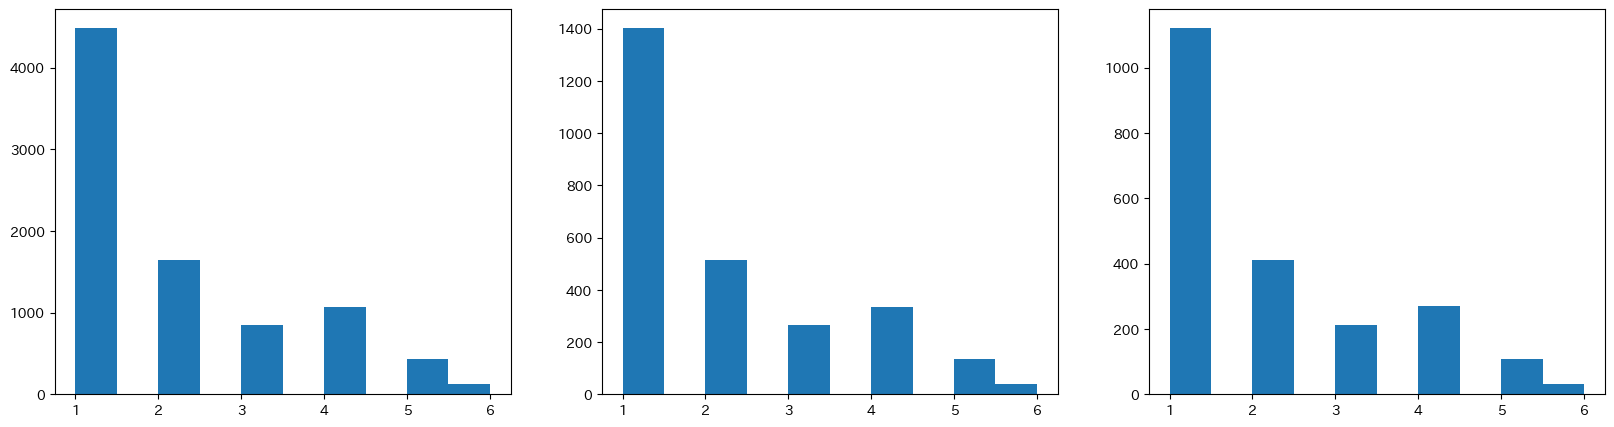

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

X = main_data.drop(['setting','日付'],axis=1).values
y = main_data['setting'].values
columns_name = main_data.drop(['setting','日付'],axis=1).columns
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 

def data_split(X,y):
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train = pd.DataFrame(X_train, columns=columns_name)
    X_test = pd.DataFrame(X_test, columns=columns_name)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_split(X, y)
X_train, y_train, X_val, y_val = data_split(X_train.values, y_train)

print("train shape", X_train.shape)
print("test shape", X_test.shape)
print("validation shape", X_val.shape)
print(X_train.columns, X_test.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(y_train)

plt.subplot(1,3,2)
plt.hist(y_test)

plt.subplot(1,3,3)
plt.hist(y_val)

Index(['機種名', '台番号', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2',
       'day_zoro', 'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚',
       '前日のG数', '前日のBB確率', '前日のRB確率'],
      dtype='object')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 8624, number of used features: 16
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -0.652474
[LightGBM] [Info] Start training from score -1.658025
[LightGBM] [Info] Start training from score -2.313545
[LightGBM] [Info] Start training from score -2.084091
[LightGBM] [Info] Start training from score -2.993879
[LightGBM] [Info] Start training from score -4.179502


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

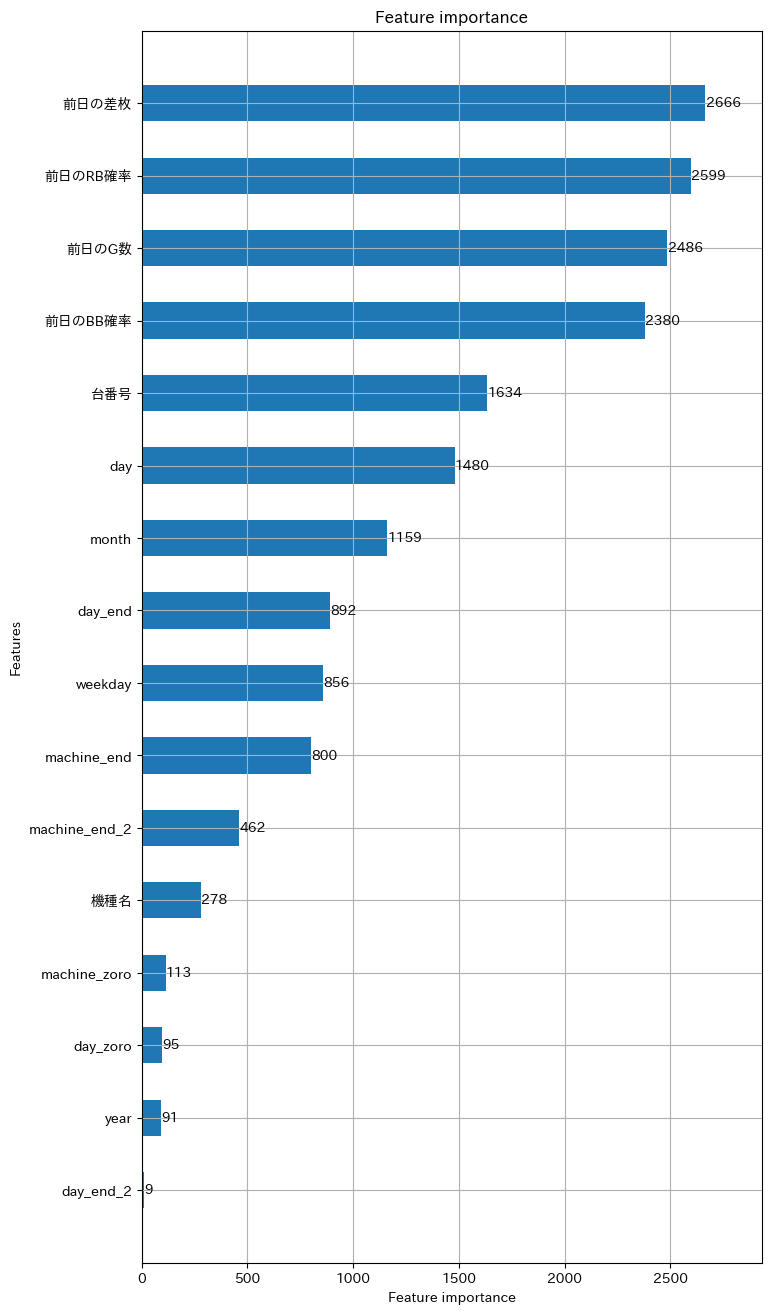

In [60]:
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train = X_train.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
X_test = X_test.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
print(X_train.columns)
# 文字列と数値の対応を定義した辞書
mapping = {'アイムジャグラーEX-TP': 1, 'マイジャグラーV': 2, 'ファンキージャグラー2': 3, 'ハッピージャグラーVIII': 4}

#lightgbmを行うために各objectをint、floatに変換
for column in X_train.columns:
    if column=="機種名":
        # '機種名' 列をマップして置き換え
        X_train[column] = X_train[column].map(mapping)
        X_test[column] = X_test[column].map(mapping)
    if column in ['台番号', 'G数', '差枚', 'BB', 'RB', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2', 'day_zoro',
       'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚', '前日のG数']:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
    else:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# X_train["差枚"]=X_train["差枚"].astype(int)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
             'task': 'train',
             'boosting_type': 'gbdt',
             'objective': 'multiclass', # 目的 : 多クラス分類 
             'num_class': 7, # クラス数 : 7
             'metric': {'multi_error'}, # 評価指標 : 誤り率(= 1-正答率) # 他には'multi_logloss'など
             
             }


model = lgb.train(lgb_params,
                 train_set=lgb_train, # トレーニングデータの指定
                 valid_sets=lgb_eval, # 検証データの指定
                 )

# テストデータの予測 ((各クラスの予測確率 を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラスを返す)
y_pred = np.argmax(y_pred_prob, axis=1) # 一番大きい予測確率のクラスを予測クラスに


lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [61]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3]
                            , 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5], 'target6_prob':y_pred_prob[:,6]})
display(df_pred_prob)


,target,target_pred
0,1,1
1,2,1
2,3,2
3,1,1
4,1,1
5,1,2
6,3,1
7,1,1
8,2,1
9,1,1


,y,target0_prob,target1_prob,target2_prob,target3_prob,target4_prob,target5_prob,target6_prob
0,1,1.256790e-15,0.628250,0.173207,0.078550,0.070808,0.048805,0.000379
1,2,1.194189e-15,0.335694,0.250272,0.043983,0.273420,0.064980,0.031652
2,3,1.439149e-15,0.271635,0.358716,0.073774,0.260408,0.034011,0.001456
3,1,8.670578e-16,0.690757,0.177155,0.090481,0.023633,0.017364,0.000610
4,1,7.169339e-16,0.862947,0.014160,0.103639,0.007348,0.010252,0.001655
5,1,6.887425e-16,0.361795,0.470156,0.045740,0.103536,0.016202,0.002570
6,3,7.614847e-16,0.715903,0.107092,0.104606,0.031667,0.037816,0.002915
7,1,9.858308e-16,0.462236,0.124651,0.053884,0.318731,0.034998,0.005499
8,2,1.377104e-15,0.280901,0.256977,0.056373,0.259659,0.141506,0.004584
9,1,6.846992e-16,0.815785,0.065003,0.095767,0.013768,0.009361,0.000317


In [63]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

Acc : 0.5166913946587537


In [51]:
df.to_csv(f"{shop_name}.csv", index=False, encoding = "shift-jis")